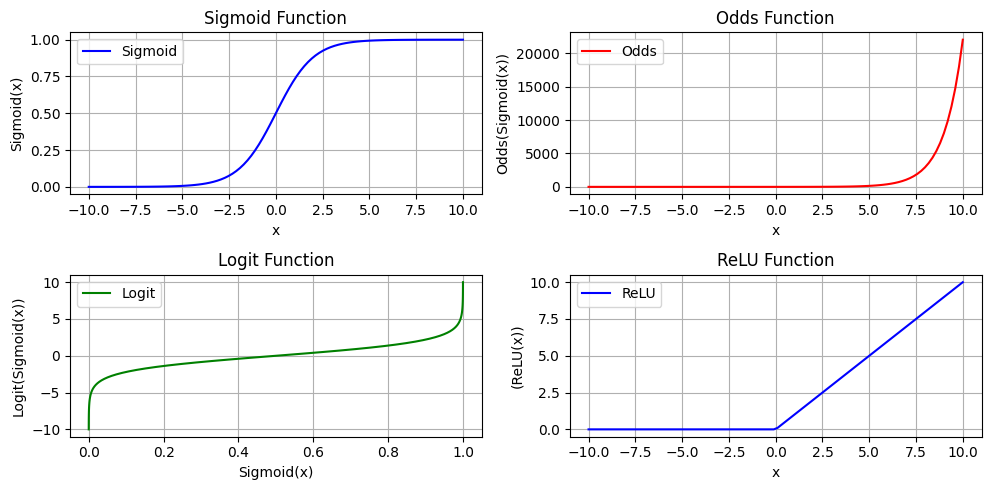

In [17]:
import numpy as np
import matplotlib.pyplot as plt

# sigmoid
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# odds 
def odds(p):
    return p / (1 - p)

# logit
def logit(p):
    return np.log(p / (1 - p))

# 범위
x = np.linspace(-10, 10, 100)

# sigmoid
plt.figure(figsize=(10, 5))
plt.subplot(2, 2, 1)
plt.plot(x, sigmoid(x), label='Sigmoid', color='blue')
plt.title('Sigmoid Function')
plt.xlabel('x')
plt.ylabel('Sigmoid(x)')
plt.grid(True)
plt.legend()

# odds
plt.subplot(2, 2, 2)
plt.plot(x, odds(sigmoid(x)), label='Odds', color='red')
plt.title('Odds Function')
plt.xlabel('x')
plt.ylabel('Odds(Sigmoid(x))')
plt.grid(True)
plt.legend()

# logit 
plt.subplot(2, 2, 3)
plt.plot(sigmoid(x), logit(sigmoid(x)), label='Logit', color='green')
plt.title('Logit Function')
plt.xlabel('Sigmoid(x)')
plt.ylabel('Logit(Sigmoid(x))')
plt.grid(True)
plt.legend()

# relu
plt.subplot(2, 2, 4)
plt.plot(x, np.maximum(x, 0), label='ReLU', color='blue')
plt.title('ReLU Function')
plt.xlabel('x')
plt.ylabel('(ReLU(x))')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()


## 2.2 단순한 논리회로
### 2.2.1 AND 게이트

In [7]:
# And gate
def AND(x1, x2):
    w1, w2, theta = 0.5, 0.5, 0.7
    tmp = x1*w1 + x2*w2
    if tmp <= theta:
        return 0
    else:
        return 1
    

In [8]:
AND(0, 0), AND(0, 1), AND(1, 0), AND(1, 1)

(0, 0, 0, 1)

## 2.3 퍼셉트론 구현하기
### 2.3.2 가중치와 편향도입

In [9]:
import numpy as np
x = np.array([0, 1])
w = np.array([0.5, 0.5])
b = -0.7
#w*x
#np.sum(w*x)
np.sum(w*x) + b

-0.19999999999999996

In [10]:
# NAND gate
def NAND(x1, x2):
    x = np.array([x1, x2])
    w = np.array([-0.5, -0.5])
    b = 0.7
    tmp = np.sum(w*x) + b
    if tmp <= 0:
        return 0
    else:
        return 1

In [11]:
# Or gate
def OR(x1, x2):
    x = np.array([x1, x2])
    w = np.array([0.5, 0.5])
    b = -0.2
    tmp = np.sum(w*x) + b
    if tmp <= 0:
        return 0
    else:
        return 1

## 2.5 다층 퍼셉트론 출동
### 2.5.2 XOR 게이트 구현

In [12]:
def XOR(x1, x2):
    s1 = NAND(x1, x2)
    s2 = OR(x1, x2)
    return AND(s1, s2)

## 3.2 활성화 함수
### 3.2.2 계단 함수

In [ ]:
def step_function(x):
    y = x > 0
    return y.astype(np.int)

In [14]:
import numpy as np
x = np.array([-1.0, 1.0, 2.0])
y = x > 0
y

array([False,  True,  True])

## 3.3 다차원 배열의 계산
### 3.3.1 다차원 배열

In [20]:
import numpy as np
A = np.array([1,2,3,4])
np.ndim(A) , A.shape ,A.shape[0]

(1, (4,), 4)

In [21]:
B = np.array([[1,2], [3,4], [5,6]])
np.ndim(B), B.shape

(2, (3, 2))

### 3.2.2. 행렬 내적

In [22]:
A = np.array([[1,2], [3,4]])
B = np.array([[5,6], [7,8]])
np.dot(A, B)

array([[19, 22],
       [43, 50]])

In [23]:
A = np.array([[1,2,3], [4,5,6]])
B = np.array([[1,2],[3,4],[5,6]])

np.dot(A, B)

array([[22, 28],
       [49, 64]])

In [25]:
C = np.array([[1,2],[3,4]])
#np.dot(A,C)
# 행렬 A의 1번째 차원과 행렬 C의 0번째 차원 원소 수가 다름

ValueError: shapes (2,3) and (2,2) not aligned: 3 (dim 1) != 2 (dim 0)

### 3.3.3 신경망의 내적

In [27]:
X  = np.array([1,2])
W = np.array([[1,3,5], [2,4,6]])

Y = np.dot(X, W)
print(Y)

[ 5 11 17]


## 3.4 3층 신경망 구성
### 3.4.2 각 층의 신호 전달 구현하기

In [29]:
X = np.array([1.0, 0.5])
W1 = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
B1 = np.array([0.1, 0.2, 0.3])

A1 = np.dot(X, W1) + B1
Z1 = sigmoid(A1)
print(A1,Z1)


[0.3 0.7 1.1] [0.57444252 0.66818777 0.75026011]


In [30]:
W2 = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
B2 = np.array([0.1, 0.2])

A2 = np.dot(Z1, W2) + B2
Z2 = sigmoid(A2)
print(A2, Z2)

[0.51615984 1.21402696] [0.62624937 0.7710107 ]


In [31]:
def indentity_function(x):
    return x

W3 = np.array([[0.1, 0.3], [0.2, 0.4]])
B3 = np.array([0.1, 0.2])

A3 = np.dot(Z2, W3) + B3
Y = indentity_function(A3)
print(Y)

[0.31682708 0.69627909]


### 3.4.3 구현 정리

In [32]:
def init_network():
    network = {}
    network['W1'] = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
    network['b1'] = np.array([0.1, 0.2, 0.3])
    network['W2'] = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
    network['b2'] = np.array([0.1, 0.2])
    network['W3'] = np.array([[0.1, 0.3], [0.2, 0.4]])
    network['b3'] = np.array([0.1, 0.2])
    
    return network

def forward(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']
    
    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = indentity_function(a3)
    
    return y

network = init_network()
x = np.array([1.0, 0.5])
y = forward(network, x)
print(y)


[0.31682708 0.69627909]


## 3.5출력층 설계
### 3.5.1 항등 함수와 소프트맥스 함수 구현하기

In [33]:
a = np.array([0.3, 2.9, 4.0])
exp_a = np.exp(a)   
print(exp_a)

sum_exp_a = np.sum(exp_a)
print(sum_exp_a)

y = exp_a / sum_exp_a
print(y)

[ 1.34985881 18.17414537 54.59815003]
74.1221542101633
[0.01821127 0.24519181 0.73659691]


In [34]:
def softmax(a):
    exp_a = np.exp(a)
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a

    return y

# 소프트맥스 함수의 지수 함수 계산 시 어떤 정수를 더해도 결과 바뀌지 않음, 오버플로우를 막기 위해 입력 신호 중 최대값를 이용


In [35]:
a = np.array([1010, 1000, 990])
np.exp(a) / np.sum(np.exp(a))

C:\Users\dmswl\AppData\Local\Temp\ipykernel_9028\832863605.py:2: RuntimeWarning: overflow encountered in exp
  np.exp(a) / np.sum(np.exp(a))
C:\Users\dmswl\AppData\Local\Temp\ipykernel_9028\832863605.py:2: RuntimeWarning: invalid value encountered in divide
  np.exp(a) / np.sum(np.exp(a))


array([nan, nan, nan])

In [36]:
c = np.max(a) # 1010
np.exp(a -c) / np.sum(np.exp(a - c))

array([9.99954600e-01, 4.53978686e-05, 2.06106005e-09])

### 3.5.3 소프트맥스 함수 특징

In [38]:
a = np.array([0.3, 2.9, 4.0])
y = softmax(a)
print(y)
np.sum(y)

[0.01821127 0.24519181 0.73659691]


1.0